## Loading and Preprocessing

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


df = sns.load_dataset('titanic')

df.drop(columns=['deck', 'embark_town', 'alive', 'class', 'who', 'adult_male', 'alone'], inplace=True)
df.dropna(subset=['age', 'embarked', 'fare'], inplace=True)

df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['embarked'] = df['embarked'].map({'S': 0, 'C': 1, 'Q': 2})

X_c = df.drop(columns=['survived'])
y_c = df['survived']

X_r = df.drop(columns=['fare'])
y_r = df['fare']

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_c, y_c, test_size=0.2, random_state=42)
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_r, y_r, test_size=0.2, random_state=42)

## Classifier

In [13]:
rf_c = RandomForestClassifier(n_estimators=100, oob_score=True, max_features='sqrt', bootstrap=True, random_state=42)
rf_c.fit(X_train_c, y_train_c)

print("OOB Score:", rf_c.oob_score_)
y_pred_c = rf_c.predict(X_test_c)

print(classification_report(y_test_c, y_pred_c))
print("Confusion Matrix:\n", confusion_matrix(y_test_c, y_pred_c))

OOB Score: 0.7873462214411248
              precision    recall  f1-score   support

           0       0.80      0.82      0.81        80
           1       0.77      0.73      0.75        63

    accuracy                           0.78       143
   macro avg       0.78      0.78      0.78       143
weighted avg       0.78      0.78      0.78       143

Confusion Matrix:
 [[66 14]
 [17 46]]


## Regressor

In [14]:
rf_r = RandomForestRegressor(n_estimators=100, oob_score=True, max_features='sqrt', bootstrap=True, random_state=42)
rf_r.fit(X_train_r, y_train_r)

print("OOB Score (R²):", rf_r.oob_score_)
y_pred_r = rf_r.predict(X_test_r)

print("RMSE:", np.sqrt(mean_squared_error(y_test_r, y_pred_r)))
print("R² Score:", r2_score(y_test_r, y_pred_r))

OOB Score (R²): 0.4773773554113363
RMSE: 58.357198896233136
R² Score: 0.3419737181843685


## Plotting

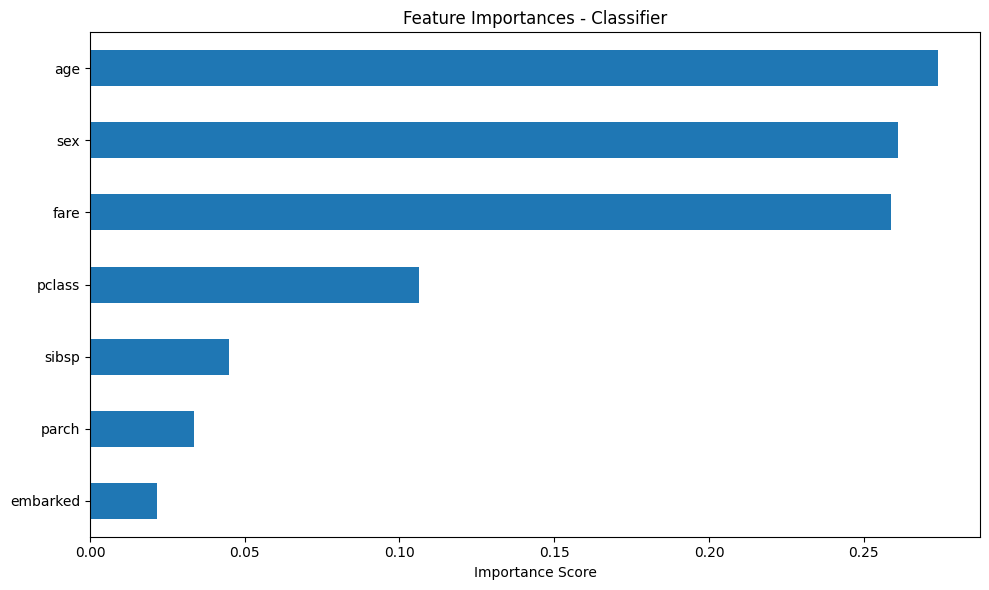

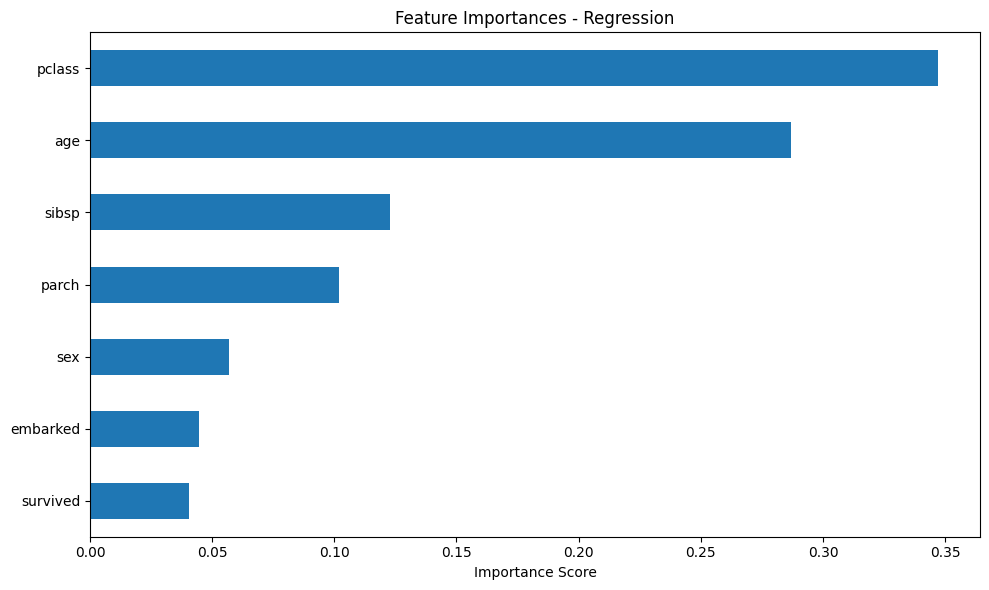

In [27]:
importances = pd.Series(rf_c.feature_importances_, index=X_c.columns)
importances.sort_values().plot(kind='barh', figsize=(10, 6))
plt.title("Feature Importances - Classifier")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

importances = pd.Series(rf_r.feature_importances_, index=X_r.columns)
importances.sort_values().plot(kind='barh', figsize=(10, 6))
plt.title("Feature Importances - Regression")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

## Tuning

In [28]:
for n in [10, 50, 100, 200]:
    for mf in ['sqrt', 'log2', None]:
        model = RandomForestClassifier(n_estimators=n, max_features=mf, oob_score=True, bootstrap=True, random_state=42)
        model.fit(X_train_c, y_train_c)
        print(f"n_estimators={n}, max_features={mf}, OOB Score={model.oob_score_:.3f}")
    print()

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


n_estimators=10, max_features=sqrt, OOB Score=0.784
n_estimators=10, max_features=log2, OOB Score=0.784
n_estimators=10, max_features=None, OOB Score=0.787

n_estimators=50, max_features=sqrt, OOB Score=0.787
n_estimators=50, max_features=log2, OOB Score=0.787
n_estimators=50, max_features=None, OOB Score=0.791

n_estimators=100, max_features=sqrt, OOB Score=0.787
n_estimators=100, max_features=log2, OOB Score=0.787
n_estimators=100, max_features=None, OOB Score=0.793

n_estimators=200, max_features=sqrt, OOB Score=0.794
n_estimators=200, max_features=log2, OOB Score=0.794
n_estimators=200, max_features=None, OOB Score=0.794

